In [236]:
# Data Preprocessing:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# #GAN Model:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import math
import matplotlib.pyplot as plt

from collections import namedtuple
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
# from tensorflow.keras.layers import BatchNormalization, LeakyReLU
# from tensorflow.keras.models import Sequential

# Example #1: Sine Curve

In [134]:
torch.manual_seed(111)
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

train_set

[(tensor([ 4.4960, -0.9767]), tensor(0.)),
 (tensor([ 5.7428, -0.5145]), tensor(0.)),
 (tensor([1.7710, 0.9800]), tensor(0.)),
 (tensor([1.6217, 0.9987]), tensor(0.)),
 (tensor([ 3.9654, -0.7337]), tensor(0.)),
 (tensor([ 3.7702, -0.5881]), tensor(0.)),
 (tensor([ 5.8509, -0.4190]), tensor(0.)),
 (tensor([1.3527, 0.9763]), tensor(0.)),
 (tensor([ 3.7905, -0.6043]), tensor(0.)),
 (tensor([ 4.6042, -0.9942]), tensor(0.)),
 (tensor([1.1669, 0.9195]), tensor(0.)),
 (tensor([ 3.2048, -0.0632]), tensor(0.)),
 (tensor([ 4.7404, -0.9996]), tensor(0.)),
 (tensor([1.8120, 0.9710]), tensor(0.)),
 (tensor([ 3.6283, -0.4678]), tensor(0.)),
 (tensor([0.2252, 0.2233]), tensor(0.)),
 (tensor([0.6448, 0.6011]), tensor(0.)),
 (tensor([2.1483, 0.8378]), tensor(0.)),
 (tensor([2.7645, 0.3682]), tensor(0.)),
 (tensor([ 3.9842, -0.7464]), tensor(0.)),
 (tensor([ 3.9106, -0.6954]), tensor(0.)),
 (tensor([ 3.9801, -0.7436]), tensor(0.)),
 (tensor([ 5.3908, -0.7786]), tensor(0.)),
 (tensor([0.9877, 0.8348]), t

In [141]:
train_set[0][0][0].dtype

torch.float32

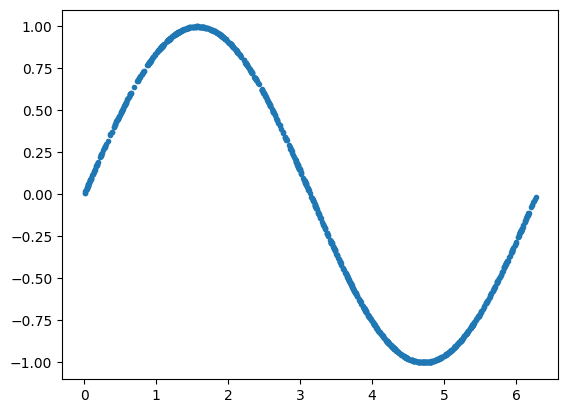

In [59]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [60]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
# #PRACTICE:
    
# def dummy_iterator(n):
#     # for nn in range(0,n,2):
#     #     yield [nn] if nn == n-1 else [nn, nn+1]
    
#     for nn in range(0,n-1):
#         yield [nn,nn+1]

# di = dummy_iterator(5)
# next(di), next(di), next(di), next(di), next(di, None)

In [75]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

discriminator = Discriminator()
generator = Generator()

In [63]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.19106775522232056
Epoch: 0 Loss G.: 1.888679027557373
Epoch: 10 Loss D.: 0.6593941450119019
Epoch: 10 Loss G.: 0.9345510005950928
Epoch: 20 Loss D.: 0.6652076840400696
Epoch: 20 Loss G.: 0.9237954616546631
Epoch: 30 Loss D.: 0.6413139700889587
Epoch: 30 Loss G.: 1.2015196084976196
Epoch: 40 Loss D.: 0.6468715667724609
Epoch: 40 Loss G.: 0.8774316310882568
Epoch: 50 Loss D.: 0.609466552734375
Epoch: 50 Loss G.: 0.8437349796295166
Epoch: 60 Loss D.: 0.6556791067123413
Epoch: 60 Loss G.: 1.0075379610061646
Epoch: 70 Loss D.: 0.6960742473602295
Epoch: 70 Loss G.: 0.6564761996269226
Epoch: 80 Loss D.: 0.7309169769287109
Epoch: 80 Loss G.: 0.8384610414505005
Epoch: 90 Loss D.: 0.6479066610336304
Epoch: 90 Loss G.: 0.782609224319458
Epoch: 100 Loss D.: 0.6487395763397217
Epoch: 100 Loss G.: 0.7705395221710205
Epoch: 110 Loss D.: 0.6514592170715332
Epoch: 110 Loss G.: 0.9193305969238281
Epoch: 120 Loss D.: 0.6158775091171265
Epoch: 120 Loss G.: 0.8445844054222107
Epoch: 130

In [76]:
for i in range(0,8):
    print(len([d for d in discriminator.parameters()][i]))

256
256
128
128
64
64
1
1


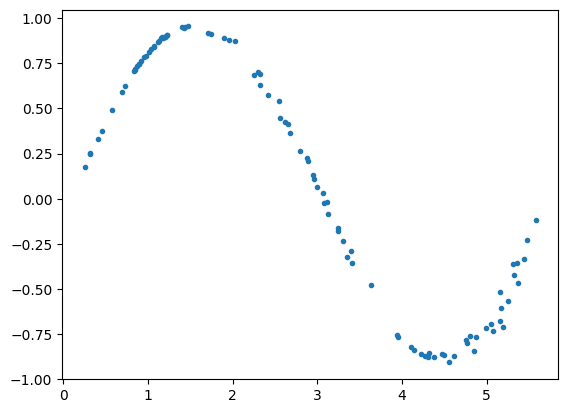

In [65]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

# Example #2: Images

In [2]:
torch.manual_seed(111)

In [21]:
device = ""
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [39]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)
train_set.data = train_set.data[:8000]

In [69]:
train_set#.targets

Dataset MNIST
    Number of datapoints: 8000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [40]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [133]:
train_set.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

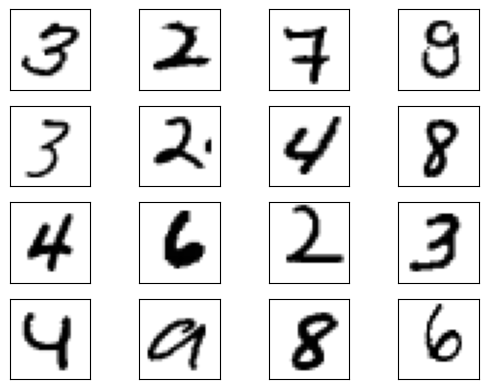

In [41]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [42]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
    
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

discriminator = Discriminator().to(device=device)
generator = Generator().to(device=device)

In [43]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5995267629623413
Epoch: 0 Loss G.: 0.45516514778137207
Epoch: 1 Loss D.: 0.06797648966312408
Epoch: 1 Loss G.: 3.4017651081085205
Epoch: 2 Loss D.: 0.095725417137146
Epoch: 2 Loss G.: 3.2202539443969727
Epoch: 3 Loss D.: 0.08750107884407043
Epoch: 3 Loss G.: 3.3638126850128174
Epoch: 4 Loss D.: 0.028241675347089767
Epoch: 4 Loss G.: 5.268877983093262
Epoch: 5 Loss D.: 0.02926718257367611
Epoch: 5 Loss G.: 5.015444278717041
Epoch: 6 Loss D.: 0.019243258982896805
Epoch: 6 Loss G.: 5.382197380065918
Epoch: 7 Loss D.: 0.024697691202163696
Epoch: 7 Loss G.: 4.389399528503418
Epoch: 8 Loss D.: 0.05637192726135254
Epoch: 8 Loss G.: 4.925124168395996
Epoch: 9 Loss D.: 0.01783314161002636
Epoch: 9 Loss G.: 4.979429721832275
Epoch: 10 Loss D.: 0.18591174483299255
Epoch: 10 Loss G.: 6.526123523712158
Epoch: 11 Loss D.: 0.06532151997089386
Epoch: 11 Loss G.: 6.349145412445068
Epoch: 12 Loss D.: 0.03134297579526901
Epoch: 12 Loss G.: 4.275712966918945
Epoch: 13 Loss D.: 0.096845

In [47]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

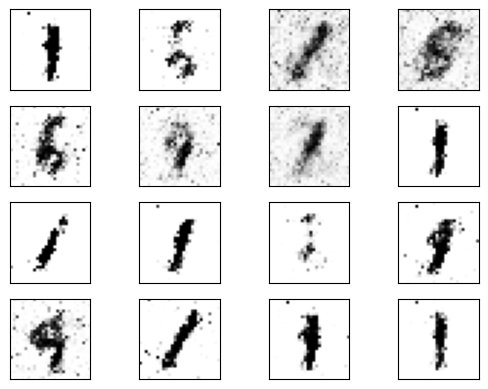

In [48]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Fraud Detection GAN

In [2]:
#TODO:

#1. Resample Data before adding to discriminator
#2. Add in Generator
#3. Increase Number of Epochs
#4. Analyze ROC and recall-precision curves
#5. Hyperparametrization (if it's even possible)

In [3]:
device = torch.device("cpu")

In [568]:
fraud_data = pd.read_csv("fraud_data.csv")
fraud_data.drop_duplicates(inplace=True)
fraud_data.Class.value_counts()

Class
0    21204
1      346
Name: count, dtype: int64

In [569]:
# torch.from_numpy(np.array(fraud_data.iloc[0,1]).astype('float32'))#.unsqueeze(dim = 0).size()
lambda x: torch.from_numpy(np.array(x).astype('float32')).unsqueeze(dim=0)

<function __main__.<lambda>(x)>

In [570]:
# y_strat = np.hstack([np.ones(shape = 5000), np.zeros(shape = fraud_data.shape[0]-5000)])
df_train, df_test = train_test_split(fraud_data, test_size=0.25, stratify = fraud_data.Class)
display(df_train.Class.value_counts(normalize = True), df_test.Class.value_counts(normalize = True))

Class
0    0.983975
1    0.016025
Name: proportion, dtype: float64

Class
0    0.983853
1    0.016147
Name: proportion, dtype: float64

In [571]:
#df_train.query("index <= 5000").shape[0]/df_train.query("index > 5000").shape[0]
df_test.query("index > 5000").shape[0]/df_test.shape[0]


0.7555679287305123

In [572]:
PdToTensor = namedtuple("PdToTensor",["df","data","labels"])
m = PdToTensor([4,5,6],[1,2,3],[1,0,0])
m

# transform = torch.from_numpy,
# target_transform = lambda x: torch.from_numpy(np.array(x).astype('float32')).unsqueeze(dim=0),

PdToTensor(df=[4, 5, 6], data=[1, 2, 3], labels=[1, 0, 0])

In [573]:
BATCH_SIZE = 32
PdToTensor = namedtuple("PdToTensor",["df","sample","data","labels"])

class CustomPandasTorch(Dataset):
    def __init__(self, df):
        # self.df = df.astype('float32') 
        self.raw = CustomPandasTorch.transform_data(df)
        self.active = self.raw
        # df_sample = (df
        #     .groupby('Class')
        #     [df.columns]
        #     .apply(lambda x: x.sample(sample_size, random_state = 6, replace = True))
        #     .sample(frac=1, random_state = 6)
        #     .reset_index(drop = True)
        # )
        # self.sample = CustomPandasTorch.transform_data(df_sample)

        df_train, df_test = train_test_split(df, test_size=0.25, stratify = df.Class)
        self.train, self.test = CustomPandasTorch.transform_data(df_train), CustomPandasTorch.transform_data(df_test)

        # self.sample_size = sample_size

        # if transform_type == "rs":
            #self.df = self.pd_sample(self.df)
        #elif transform_type == "split":        
            # self.df, self.df_test = train_test_split(self.df, test_size=0.25, stratify = fraud_data.Class)
            #self.df = self.pd_sample(self.df)
            # self.data_test = self.df_test.iloc[:,:-1]
            # self.label_test = self.df_test.iloc[:,-1]
            
        # self.data, self.label = CustomPandasTorch.extractXy(self.df)

    def transform_data(df_input):
        sample_size = max((df_input.shape[0]//BATCH_SIZE+1)*BATCH_SIZE, 16000)
        df = (df_input
                .groupby('Class')
                [df_input.columns]
                .apply(lambda x: x.sample(sample_size, random_state = 6, replace = True))
                .sample(frac=1, random_state = 6)
                .reset_index(drop = True)        
        )

        t = torch.from_numpy(df.astype('float32').values)
        return PdToTensor(df_input, df, t[:,:-1], t[:,-1:])
    
    def set_raw(self):
        self.active = self.raw
    
    def set_train(self):
        self.active = self.train

    def set_test(self):
        self.active = self.test

    def __len__(self):
        return self.active.sample.shape[0]
    
    def __getitem__(self, idx):
        # data = self.data.iloc[idx,:]
        # label = self.label.iloc[idx]

        # if self.transform:
        #     data = self.transform(data.values)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return self.active.data[idx], self.active.labels[idx]

    # def get_sample(self, size = 1000):
    #     df_resampled = (self.data
    #         .groupby(self.label)
    #         .apply(lambda x: x.sample(size, random_state = 6, replace = True))
    #         .reset_index(level = 0)
    #         .sample(frac=1, random_state = 6)
    #     )

    #     data_rs = self.data.reindex(df_resampled.index)
    #     label_rs = self.label.reindex(df_resampled.index)

    #     return self.transform_data(data_rs, label_rs)
    
    # def pd_sample(self, df):
    #     data = df.iloc[:,:-1]
    #     label = df.iloc[:,-1]

    #     return (data
    #         .groupby(label)
    #         .apply(lambda x: x.sample(self.sample_size, random_state = 6, replace = True))
    #         .reset_index(level = 0)
    #         .sample(frac=1, random_state = 6)
    #         .reindex(columns = df.columns)
    #         # .astype('float32')
    #         .reset_index(drop = True)
    #     )
    
    # def extractXy(df):
    #     return df.iloc[:,:-1], df.iloc[:,-1]

In [574]:
torch.manual_seed(111)

In [575]:
fraud_data.query("Class == 1")#.sample(512, replace = True).reset_index(drop=True)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
149,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
182,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,-4.063098,...,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1.18,1
255,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,-20.949192,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
296,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,14.955107,-3.871297,-8.581266,...,1.765987,-1.635517,-0.998317,0.138972,1.559350,-0.222125,1.504425,0.445920,99.99,1
21292,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,-4.029129,...,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,35.00,1
21325,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,-11.235048,...,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,8.54,1
21406,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,-4.626919,...,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1


In [576]:
DataGroups = namedtuple("DataGroups", ["all", "fraud", "valid"])
# train_fraud = fraud_data.sample(n = 8000).astype('float32')
# train_fraud = CustomPandasTorch.pd_sample(fraud_data, size = 4000)
# train_fraud_torch = CustomPandasTorch(
#                                         fraud_data.query("Class == 1")#.sample(512, replace = True).reset_index(drop=True)
#                                         # transform = torch.from_numpy,
#                                         # target_transform = lambda x: torch.from_numpy(np.array(x).astype('float32')).unsqueeze(dim=0),
#                                         # transform_type = None
#                                     )

dg = DataGroups(CustomPandasTorch(fraud_data), CustomPandasTorch(fraud_data.query("Class == 1")), CustomPandasTorch(fraud_data.query("Class == 0")))
#TODO: April 2 create 3 train_fraud_torch dataset (DONE)

In [577]:
# train_loader = torch.utils.data.DataLoader(
#     train_fraud_torch, batch_size=BATCH_SIZE, shuffle=True
# )

train_loader = torch.utils.data.DataLoader(
    dg.fraud, batch_size=BATCH_SIZE, shuffle=True
)

In [578]:
train_loader.dataset.set_raw()
data, label = next(iter(train_loader))
display(data.shape, label.shape)

torch.Size([32, 29])

torch.Size([32, 1])

In [579]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(29, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # x = x.view(x.size(0), 784)
        output = self.model(x)
        return output


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 29),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        # output = output.view(x.size(0), 1, 28, 28)
        return output

# discriminator = Discriminator().to(device=device)
# generator = Generator().to(device=device)

In [580]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

# optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
# optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [581]:
def train_discriminator(train_loader):
    lr = 0.0001
    num_epochs = 50
    loss_function = nn.BCELoss()

    discriminator = Discriminator()
    
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)

    for epoch in range(num_epochs):
        for n, (real_samples, real_labels) in enumerate(train_loader):
            # Training the discriminator
            discriminator.zero_grad()
            loss_discriminator = loss_function(discriminator(real_samples), real_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()
            
            # Show loss
            if n == BATCH_SIZE - 1:
                print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")

    return discriminator, None

def train_gan(train_loader):
    lr = 0.0001
    num_epochs = 50
    loss_function = nn.BCELoss()

    discriminator = Discriminator()
    generator = Generator()
    
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    for epoch in range(num_epochs):
        for n, (real_samples, real_labels) in enumerate(train_loader):
            # Data for training discriminator
            gen_samples = generator(torch.randn((BATCH_SIZE, 100)))
            gen_labels = torch.zeros((BATCH_SIZE, 1))
            all_samples = torch.cat((real_samples, gen_samples))
            all_labels = torch.cat((real_labels, gen_labels))

            # Training the discriminator
            discriminator.zero_grad()
            loss_discriminator = loss_function(discriminator(all_samples), all_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()
            
            # Data and training the generator
            generator.zero_grad()
            gen_samples = generator(torch.randn((BATCH_SIZE, 100)))
            loss_generator = loss_function(discriminator(gen_samples), real_labels) 
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss
            if n == BATCH_SIZE - 1:
                print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator}")

    return discriminator, generator

# discriminator, generator = train_gan(train_loader)

#Recall Calc:
def recall_calc(y_pred, y_test):
    return (((y_pred==1)*(y_test==1)).to(torch.float32).sum())/((y_test==1).to(torch.float32).sum())

recall_calc(discriminator(train_loader.dataset.active.data), train_loader.dataset.active.labels)


tensor(0.9564)

In [582]:
result_lst = []

for i, (t, func) in enumerate(zip([dg.all, dg.fraud], [train_discriminator, train_gan])):
    print(i)
    train_loader = torch.utils.data.DataLoader(t, batch_size=BATCH_SIZE, shuffle=True)
    discriminator, generator = func(train_loader)
    result_lst.append([recall_calc(discriminator(t.active.data), t.active.labels), t.active.sample.shape[0], t.active.df.shape[0], discriminator, generator, "all"])
    t.set_train()
    train_loader = torch.utils.data.DataLoader(t, batch_size=BATCH_SIZE, shuffle=True)
    discriminator, generator = func(train_loader)
    result_lst.append([recall_calc(discriminator(t.test.data), t.test.labels), t.active.sample.shape[0], t.active.df.shape[0], discriminator, generator, "train"])
    # break

0
Epoch: 0 Loss D.: 0.7680313587188721
Epoch: 1 Loss D.: 0.39783740043640137
Epoch: 2 Loss D.: 0.13716988265514374
Epoch: 3 Loss D.: 0.31411850452423096
Epoch: 4 Loss D.: 0.40179121494293213
Epoch: 5 Loss D.: 0.022037699818611145
Epoch: 6 Loss D.: 0.14019161462783813
Epoch: 7 Loss D.: 0.07273523509502411
Epoch: 8 Loss D.: 0.07647739350795746
Epoch: 9 Loss D.: 0.0627647116780281
Epoch: 10 Loss D.: 0.014769457280635834
Epoch: 11 Loss D.: 0.00943626370280981
Epoch: 12 Loss D.: 0.11211631447076797
Epoch: 13 Loss D.: 0.018539033830165863
Epoch: 14 Loss D.: 0.060654811561107635
Epoch: 15 Loss D.: 0.14275504648685455
Epoch: 16 Loss D.: 0.16677503287792206
Epoch: 17 Loss D.: 0.007941251620650291
Epoch: 18 Loss D.: 0.07128046452999115
Epoch: 19 Loss D.: 0.02091933600604534
Epoch: 20 Loss D.: 0.009411637671291828
Epoch: 21 Loss D.: 0.054311446845531464
Epoch: 22 Loss D.: 0.1485823392868042
Epoch: 23 Loss D.: 0.048593129962682724
Epoch: 24 Loss D.: 0.006087291985750198
Epoch: 25 Loss D.: 0.021990

In [583]:
pd.DataFrame(result_lst, columns = ["recall", "sample_size", "df_size", "disc", "gen", "df_type"])

,recall,sample_size,df_size,disc,gen,df_type
0,tensor(0.8082),43136,21550,Discriminator(\n (model): Sequential(\n (0...,None,all
1,tensor(0.7534),32384,16162,Discriminator(\n (model): Sequential(\n (0...,None,train
2,tensor(0.9807),16000,346,Discriminator(\n (model): Sequential(\n (0...,Generator(\n (model): Sequential(\n (0): L...,all
3,tensor(0.9579),16000,259,Discriminator(\n (model): Sequential(\n (0...,Generator(\n (model): Sequential(\n (0): L...,train


In [606]:
result_lst[3][3]#(t_test.active.data)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=29, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [ ]:
train_idx = dg.fraud.train.df.index
# t_test = CustomPandasTorch(dg.all.active.df.query("index not in @train_idx"))
t_test = CustomPandasTorch(dg.all.raw.df.query("index not in @train_idx"))
recall_calc(result_lst[3][3](t_test.active.data), t_test.active.labels)

tensor(0.9575)

In [ ]:
X_test = torch.from_numpy(dg.all.raw.df.query("index not in @train_idx").astype('float32').values)[:,:-1]
y_test = torch.from_numpy(dg.all.raw.df.query("index not in @train_idx").astype('float32').values)[:,-1:]
recall_calc(result_lst[3][3](X_test), y_test)
# display(X_test, y_test)

tensor(0.9655)

In [447]:
display(discriminator(train_loader.dataset.raw.data).shape, train_loader.dataset.raw.labels.shape)

torch.Size([384, 1])

torch.Size([384, 1])

In [442]:
train_loader.dataset.raw.data
train_loader.dataset.raw.labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [318]:
X_test, y_test = train_loader.dataset.transform_data(*CustomPandasTorch.extractXy(train_loader.dataset.df_test))
(discriminator(X_test).round().flatten() == y_test).to(torch.float32).mean()

AttributeError: type object 'CustomPandasTorch' has no attribute 'extractXy'

In [196]:
X_test, y_test = next(iter(train_loader))
y_test = y_test.flatten()
print((discriminator(X_test).round().flatten() == y_test).to(torch.float32).mean())
print('-'*50)
y_pred = discriminator(X_test).round().flatten()
#Recall Calculation:
(((y_pred==1)*(y_test==1)).to(torch.float32).sum())/((y_test==1).to(torch.float32).sum())

tensor(0.9688)
--------------------------------------------------


tensor(0.9375)

In [195]:
display(y_pred.shape, y_test.flatten().shape, discriminator(X_test).round().flatten().shape)

torch.Size([32])

torch.Size([32])

torch.Size([32])

In [ ]:
acc_lst = []
for _ in range(10):
    X, y = train_loader.dataset.sample()
    acc_lst.append((discriminator(X).round().flatten() == y).to(torch.float32).mean())
acc_lst

[tensor(0.9660, dtype=torch.float64),
 tensor(0.9690, dtype=torch.float64),
 tensor(0.9680, dtype=torch.float64),
 tensor(0.9620, dtype=torch.float64),
 tensor(0.9645, dtype=torch.float64),
 tensor(0.9660, dtype=torch.float64),
 tensor(0.9655, dtype=torch.float64),
 tensor(0.9620, dtype=torch.float64),
 tensor(0.9710, dtype=torch.float64),
 tensor(0.9630, dtype=torch.float64)]

In [ ]:
#Archive Accuracy list:
#acc_lst0 = acc_lst
# acc_lst1 = [tensor(0.9660, dtype=torch.float64),
#  tensor(0.9690, dtype=torch.float64),
#  tensor(0.9680, dtype=torch.float64),
#  tensor(0.9620, dtype=torch.float64),
#  tensor(0.9645, dtype=torch.float64),
#  tensor(0.9660, dtype=torch.float64),
#  tensor(0.9655, dtype=torch.float64),
#  tensor(0.9620, dtype=torch.float64),
#  tensor(0.9710, dtype=torch.float64),
#  tensor(0.9630, dtype=torch.float64)] 
#  NOTE: post-resample for training data

#acc_test2 = tensor(0.9830)

#Archive Predictions:
#y_pred0 = y_pred

#Archive Recall:
#0: tensor(0.8030, dtype=torch.float64)
#1: tensor(0.9370, dtype=torch.float64) NOTE: post-resample for training data
#2: tensor(0.8652) NOTE: post-resample and train_test_split

[tensor(0.8950, dtype=torch.float64),
 tensor(0.8960, dtype=torch.float64),
 tensor(0.8945, dtype=torch.float64),
 tensor(0.9015, dtype=torch.float64),
 tensor(0.8995, dtype=torch.float64),
 tensor(0.8975, dtype=torch.float64),
 tensor(0.8995, dtype=torch.float64),
 tensor(0.8980, dtype=torch.float64),
 tensor(0.8995, dtype=torch.float64),
 tensor(0.8955, dtype=torch.float64)]

tensor([1., 0., 0.,  ..., 0., 0., 0.], grad_fn=<ViewBackward0>)

In [ ]:
y_pred = discriminator(X).round().flatten()
#Recall Calculation:
(((y_pred==1)*(y==1)).to(torch.float32).sum())/((y==1).to(torch.float32).sum())

tensor(0.9370, dtype=torch.float64)

In [82]:
y_pred = discriminator(X_test).round().flatten()
#Recall Calculation (Test):
(((y_pred==1)*(y_test==1)).to(torch.float32).sum())/((y_test==1).to(torch.float32).sum())

tensor(0.8652)

# Precision, Accuracy, Recall Visual
![alt text](precision_acc_recall.png "Title")

# CHATGPT GAN

In [126]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset

# Load and preprocess dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Class'] = df['Class'].astype(float)
    
    X = df.drop(columns=['Class']).values
    y = df['Class'].values
    
    X = (X - X.min()) / (X.max() - X.min())  # Normalize
    
    X_train = torch.tensor(X, dtype=torch.float32)
    y_train = torch.tensor(y, dtype=torch.float32)
    
    dataset = TensorDataset(X_train, y_train)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
    
    return dataloader, X.shape[1]

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )
    
    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Training Function
def train_gan(dataloader, input_dim, epochs=50):
    latent_dim = 100
    generator = Generator(latent_dim, input_dim)
    discriminator = Discriminator(input_dim)
    
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
    
    for epoch in range(epochs):
        for real_data, _ in dataloader:
            batch_size = real_data.shape[0]
            
            # Train Discriminator
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)
            
            optimizer_D.zero_grad()
            
            real_output = discriminator(real_data)
            real_loss = criterion(real_output, real_labels)
            
            z = torch.randn(batch_size, latent_dim)
            fake_data = generator(z)
            fake_output = discriminator(fake_data.detach())
            fake_loss = criterion(fake_output, fake_labels)
            
            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_D.step()
            
            # Train Generator
            optimizer_G.zero_grad()
            
            fake_output = discriminator(fake_data)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            optimizer_G.step()
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    
    return generator, discriminator

# Run in an IPython Notebook
dataloader, input_dim = load_data("fraud_data.csv")
generator, discriminator = train_gan(dataloader, input_dim)


Epoch 0/50 | D Loss: 1.3903 | G Loss: 0.6907
Epoch 10/50 | D Loss: 1.3097 | G Loss: 0.7369
Epoch 20/50 | D Loss: 1.2634 | G Loss: 0.7891
Epoch 30/50 | D Loss: 1.2941 | G Loss: 0.7573
Epoch 40/50 | D Loss: 1.2483 | G Loss: 0.7765


In [125]:
y_pred = discriminator(X_test).round()#.flatten()
#Recall Calculation (Test):
(((y_pred==1)*(y_test==1)).to(torch.float32).sum())/((y_test==1).to(torch.float32).sum())

tensor(0.)

In [133]:
X_test

tensor([[-1.4634e+00, -3.8043e-01,  1.7453e+00,  ...,  6.0245e-02,
          7.5523e-02,  3.8040e+01],
        [ 2.0674e+00, -1.0375e+00, -1.1403e+00,  ..., -1.9041e-02,
         -4.2677e-02,  9.8750e+01],
        [ 1.2518e+00, -5.4794e-01,  5.3789e-01,  ..., -5.8402e-02,
          2.7523e-02,  6.8490e+01],
        ...,
        [-1.2681e+00, -1.0811e+00,  1.1119e+00,  ..., -2.7142e-01,
         -1.2581e-01,  1.6985e+02],
        [-4.0760e+00,  9.6303e-01, -5.0761e+00,  ...,  1.8997e+00,
          5.1146e-01,  1.0000e+00],
        [-1.8301e+00, -5.0844e-01,  8.1975e-01,  ..., -1.5215e-01,
          4.7413e-01,  3.0980e+01]])